In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [3]:
A = imread('./mandrill-large.tiff')

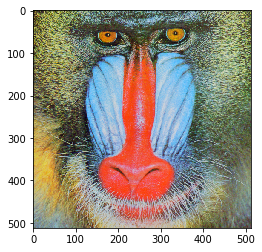

In [4]:
plt.imshow(A)

In [5]:
B = imread('./mandrill-small.tiff')

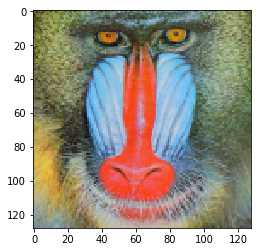

In [6]:
plt.imshow(B)

In [7]:
import numpy as np
from scipy.spatial.distance import pdist

from IPython.display import Image

In [9]:
print(A.shape)
print(B.shape)

(512, 512, 3)
(128, 128, 3)


In [10]:
X = B.reshape(-1,3)

In [11]:
num_clusters = 16

implementation of Kmeans

In [26]:
def kmeans(X, num_clusters):
    # step 1: picking random data points from data as the initial centroids to avoid empty cluster
    idxes = np.random.choice(np.arange(X.shape[0]), size = num_clusters, replace= False)
    centroids = X[idxes]
    
    err_history = []
    err = 1e6
    while err > 1:
        dists_list = []
        # step 2: calculate every points' distances to the centroids
        for c in centroids:
            ds = np.sqrt(np.sum((X - c) ** 2, axis = 1))
            dists_list.append(ds)
            
        assign = np.stack(dists_list).argmin(axis = 0)
        
        # step 3: get the new centroids
        nc_list = []
        for k in range(num_clusters):
            _idxes = np.where(assign==k)[0]
            nc_list.append(X[_idxes].mean(axis = 0))
            
        nc = np.stack(nc_list)
        err = np.sum(np.abs(nc-centroids))
        err_history.append(err)
        centroids = nc
    return centroids, assign, err_history

In [27]:
centroids, _, err_history = kmeans(X, 16)

Text(0,0.5,'error')

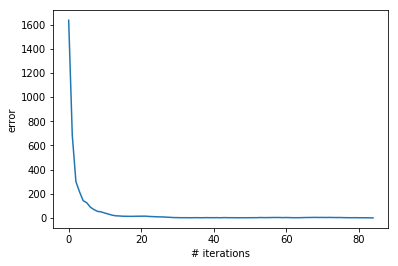

In [28]:
plt.plot(err_history)
plt.xlabel('# iterations')
plt.ylabel('error')

In [29]:
X_large = A.reshape(-1,3)

In [63]:
dist_list = []
dim = A.shape[0]
for c in centroids:
    dist = np.sqrt(np.sum((X_large - c)**2, axis = 1))
    dist_list.append(dist)
    
assign = np.stack(dist_list).argmin(axis = 0)

In [67]:
compressed = np.zeros_like(X_large)
for k in range(num_clusters):
    # print(k)
    _idxes = np.where(assign == k)[0]
    compressed[_idxes] = centroids[k]# .astype(int)

In [68]:
np.unique(compressed)

array([ 39,  44,  56,  58,  69,  72,  76,  80,  87,  91,  92,  96, 106,
       108, 110, 113, 116, 117, 119, 120, 125, 133, 134, 137, 139, 141,
       146, 155, 157, 160, 163, 165, 166, 172, 175, 177, 182, 192, 202,
       205, 221, 227, 236], dtype=uint8)

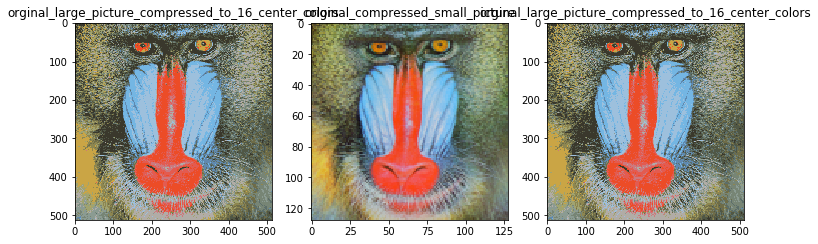

In [69]:
fig, axes = plt.subplots(1, 3, figsize = (12, 4))
axes = axes.ravel()
for i, ax in enumerate(axes):
    if i == 0:
        ax.imshow(A)
        ax.set_title('original_large_picture')
    if i == 1:
        ax.imshow(B)
        ax.set_title('original_compressed_small_picture')
    else:
        ax.imshow(compressed.reshape(A.shape))
        ax.set_title('orginal_large_picture_compressed_to_16_center_colors')

从上面的图片当中可以看出来, 后面的compressed的图片比原始的压缩图片要清晰.

In [71]:
import pandas as pd

pd.DataFrame(X_large).drop_duplicates().shape

(230427, 3)

In [72]:
pd.DataFrame(X).drop_duplicates().shape

(16057, 3)

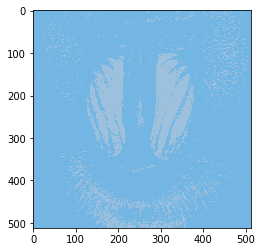

In [46]:
plt.imshow(compressed.reshape(A.shape))